In [25]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.titlesize"] = 30

NUM_TOPICS = 30


cmap = matplotlib.cm.get_cmap('CMRmap')
my_color = [cmap(x/30) for x in range(0,30)]

%matplotlib inline

In [2]:
## Data processing and ingestion

In [3]:
topic_dict = {
    16: ['case','report','coronavirus','country'],
    23: ['Italy','coronavirus','govern','country','europe'],
    11: ['china','wuhan','outbreak','virus','case'],
    2:  ['march','reuter','coronavirus','edit','report'],
    8:  ['bank','economy','said','rate','market'],
    17: ['market','stock','index','investor','dollar'],
    30: ['like','go','now','time','people','even'],
    12: ['virus','health','people','coronavirus','case','disease'],
    28: ['$','economy','year','billion','million','impact'],
    19: ['trump','presid','said','coronavirus','test'],
    7:  ['people','get','can','go','home'],
    13: ['state','new','said','york','city','case'],
    10: ['billion','business','fund','help','worker'],
    14: ['employee','said','work','office','home'],
    4:  ['flight','airline','travel','passenger','ship','cruise'],
    22: ['event','cancel','postpone','game','march'],
    29: ['china','product','factory','supply','manufacture'],
    27: ['hospital','mask','medic','care','patient','said'],
    15: ['oil','price','demand','said'],
    20: ['test','vaccine','drug','coronavirus','treatment'],
    5:  ['company','google','business','data','tech','app'],
    26: ['store','food','worker','delivery','amazon','restaurant'],
    18: ['senate','democrat','vote','house','republican','bill','trump'],
    9:  ['govern','prison','court','state'],
    21: ['coronavirus','media','post','news','twitter'],
    25: ['show','new','movie','theater','disney'],
    1:  ['coronavirus','hill','capitol','dc','washionton'],
    3:  ['window','taboola','cpronavirus','inside','us'],
    24: ['school','student','university','close','class','college'],
    6:  ['de','la','el','que','en','y']
}

In [17]:
data = pd.read_csv('combined-v2-drop-na.csv',index_col=0,parse_dates=['date'])
data.head(2)

,title,date,article,publication
1,COVID-19_pandemic,2020-01-05,"2019-2020 China pneumonia outbreak, or China p...",Wikipedia
2,COVID-19_pandemic,2020-01-05,"2019-2020 China pneumonia outbreak, or China p...",Wikipedia


In [8]:
gamma = pd.read_csv('topic_td_gamma_topics_v2.csv',index_col=0)
gamma.head(5)

,document,topic,gamma
1,1,1,9.180428e-07
2,2,1,9.180428e-07
3,3,1,1.272445e-06
4,4,1,1.476476e-06
5,5,1,2.569474e-06


In [24]:
for i in range(1,NUM_TOPICS+1):
    data[str(i)]=gamma[gamma.topic==i].gamma.values
data.head()

,title,date,article,publication,1,2,3,4,5,6,...,21,22,23,24,25,26,27,28,29,30
1,COVID-19_pandemic,2020-01-05,"2019-2020 China pneumonia outbreak, or China p...",Wikipedia,9.180428e-07,0.000002,0.000004,5.721877e-06,0.000034,5.246082e-06,...,0.000004,0.000020,2.794534e-09,0.101686,1.995021e-06,0.000002,9.242181e-06,0.000002,0.000017,7.971495e-07
2,COVID-19_pandemic,2020-01-05,"2019-2020 China pneumonia outbreak, or China p...",Wikipedia,9.180428e-07,0.000002,0.000004,5.721877e-06,0.000034,5.246082e-06,...,0.000004,0.000020,2.794534e-09,0.101686,1.995021e-06,0.000002,9.242181e-06,0.000002,0.000017,7.971495e-07
3,COVID-19_pandemic,2020-01-06,"2019-2020 China pneumonia outbreak, or China p...",Wikipedia,1.272445e-06,0.000001,0.000006,2.637815e-07,0.000012,2.865545e-08,...,0.000004,0.000006,9.841268e-09,0.000077,4.814592e-07,0.000002,1.979329e-08,0.000004,0.000020,1.990460e-06
4,COVID-19_pandemic,2020-01-06,"2019-2020 China pneumonia outbreak, or China p...",Wikipedia,1.476476e-06,0.000002,0.000007,3.662248e-06,0.000031,1.803208e-06,...,0.000005,0.000015,9.970100e-09,0.024937,1.726134e-06,0.000002,2.297403e-06,0.000004,0.000020,1.466330e-06
5,COVID-19_pandemic,2020-01-06,"2019-2020 China pneumonia outbreak, or China p...",Wikipedia,2.569474e-06,0.000009,0.000009,1.361251e-05,0.000165,7.938351e-06,...,0.000017,0.000045,1.724181e-08,0.210031,4.187353e-06,0.000005,1.287838e-05,0.000015,0.000068,1.931407e-06


In [30]:
data.head()

,title,date,article,publication,1,2,3,4,5,6,...,21,22,23,24,25,26,27,28,29,30
1,COVID-19_pandemic,2020-01-05,"2019-2020 China pneumonia outbreak, or China p...",Wikipedia,9.180428e-07,0.000002,0.000004,5.721877e-06,0.000034,5.246082e-06,...,0.000004,0.000020,2.794534e-09,0.101686,1.995021e-06,0.000002,9.242181e-06,0.000002,0.000017,7.971495e-07
2,COVID-19_pandemic,2020-01-05,"2019-2020 China pneumonia outbreak, or China p...",Wikipedia,9.180428e-07,0.000002,0.000004,5.721877e-06,0.000034,5.246082e-06,...,0.000004,0.000020,2.794534e-09,0.101686,1.995021e-06,0.000002,9.242181e-06,0.000002,0.000017,7.971495e-07
3,COVID-19_pandemic,2020-01-06,"2019-2020 China pneumonia outbreak, or China p...",Wikipedia,1.272445e-06,0.000001,0.000006,2.637815e-07,0.000012,2.865545e-08,...,0.000004,0.000006,9.841268e-09,0.000077,4.814592e-07,0.000002,1.979329e-08,0.000004,0.000020,1.990460e-06
4,COVID-19_pandemic,2020-01-06,"2019-2020 China pneumonia outbreak, or China p...",Wikipedia,1.476476e-06,0.000002,0.000007,3.662248e-06,0.000031,1.803208e-06,...,0.000005,0.000015,9.970100e-09,0.024937,1.726134e-06,0.000002,2.297403e-06,0.000004,0.000020,1.466330e-06
5,COVID-19_pandemic,2020-01-06,"2019-2020 China pneumonia outbreak, or China p...",Wikipedia,2.569474e-06,0.000009,0.000009,1.361251e-05,0.000165,7.938351e-06,...,0.000017,0.000045,1.724181e-08,0.210031,4.187353e-06,0.000005,1.287838e-05,0.000015,0.000068,1.931407e-06


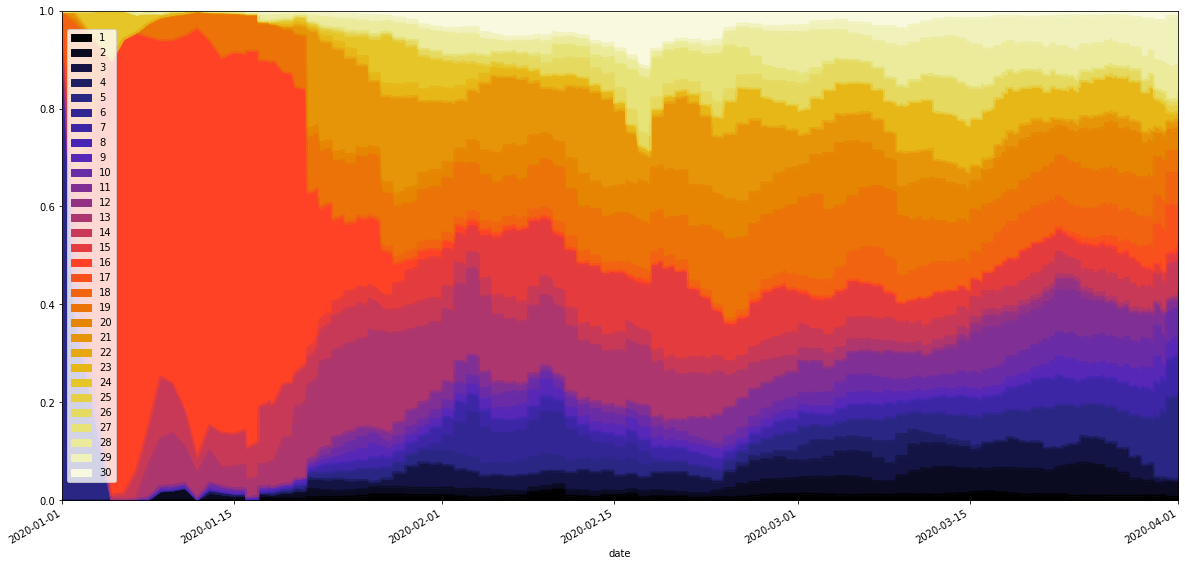

In [62]:
# get date ready
selected_topic = data[['date']+[str(i) for i in range(1,NUM_TOPICS+1)]]#.set_index(keys='date',drop=True)
selected_topic = selected_topic[selected_topic['date'] <= '2020-4-1']

# get rolling percentage
selected_topic = selected_topic.groupby('date').sum()
selected_topic_rolling = selected_topic.rolling('3D').sum()
selected_topic_perc = selected_topic_rolling.divide(selected_topic_rolling.sum(axis=1), axis=0).fillna(0)

#plot
selected_topic_perc.plot.area(ylim=(0,1),figsize=(20,10),color=my_color)
plt.show()

In [44]:
def plot_specific_topic(data, selected_topic_perc, my_color,topic_number=None):
    # get date ready
    selected_topic = data[['date']+[str(i) for i in range(1,NUM_TOPICS+1)]]#.set_index(keys='date',drop=True)
    selected_topic = selected_topic[selected_topic['date'] <= '2020-4-1']

    # get rolling percentage
    selected_topic = selected_topic.groupby('date').sum()
    selected_topic_rolling = selected_topic.rolling('3D').sum()
    selected_topic_perc = selected_topic_rolling.divide(selected_topic_rolling.sum(axis=1), axis=0).fillna(0)

    #plot
    if topic_number:
        
        selected_topic_perc.plot.area(ylim=(0,1),figsize=(20,10),
                                  color=[my_color[x]  if x==topic_number-1  else (my_color[x][0],my_color[x][1],my_color[x][2],0.5) for x in range(30)],
                                  title='Percentage of Topic %d(%s) changes per day'%(topic_number,topic_dict[topic_number]),
                                  )
    else:
        selected_topic_perc.plot.area(ylim=(0,1),figsize=(20,10),color=my_color)
    plt.show()

## Plot the overall Topic percentage distribution per day

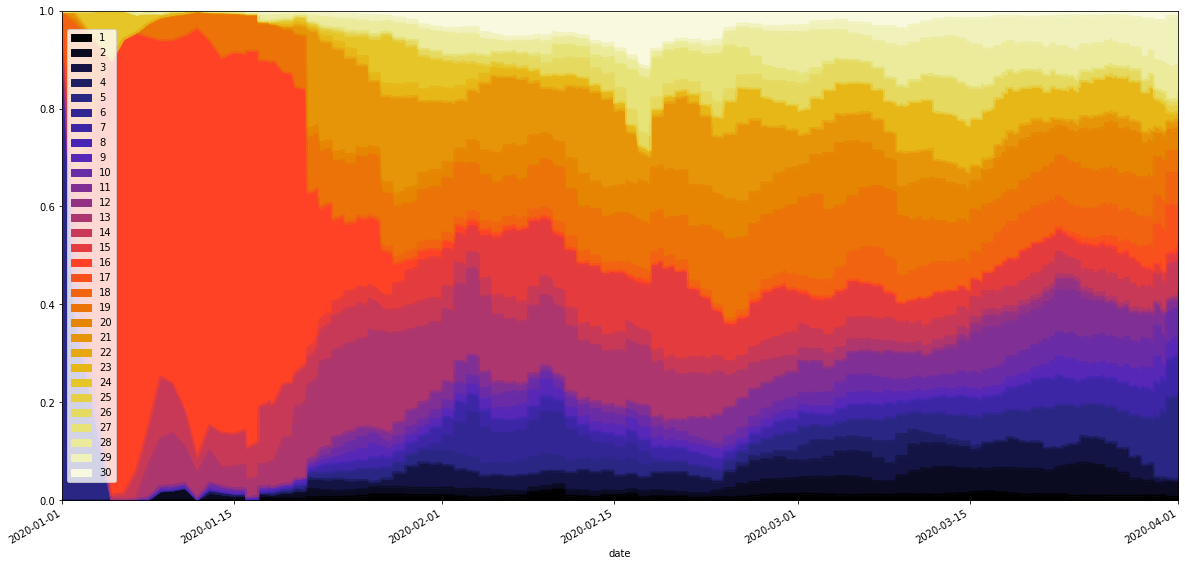

In [45]:
# Plot the overall coverage percentage of each topic per day


plot_specific_topic(data, selected_topic_perc, my_color,topic_number=None)

## Plot the change of specific topic given Number

### plot the change of topic related to Coronavirus Outbreak in Wuhan

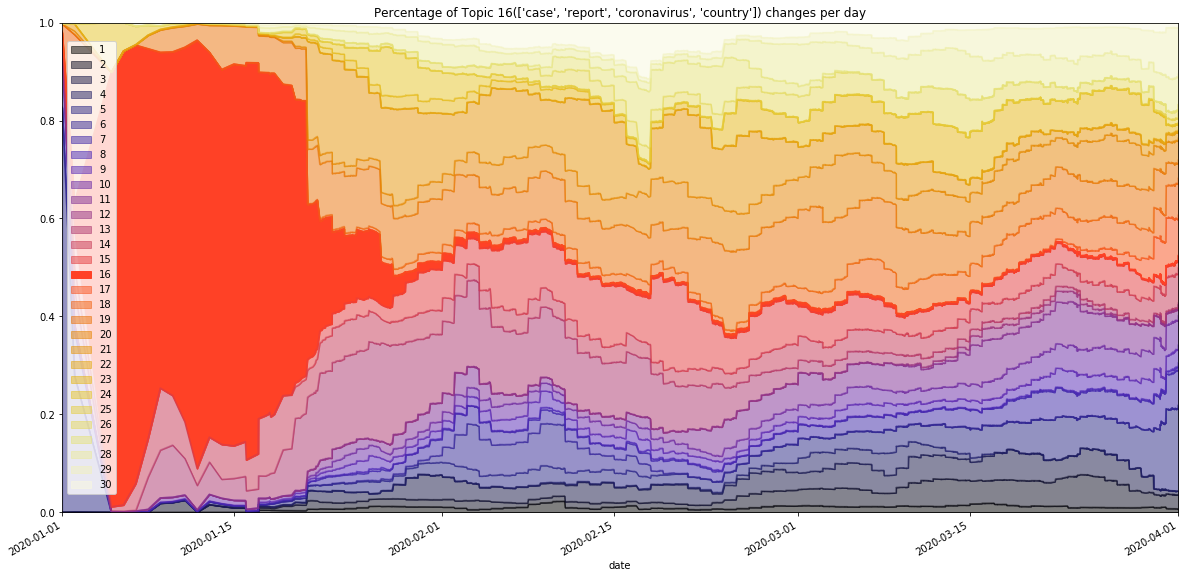

In [53]:
# plot the change of topic related to Coronavirus Outbreak in Wuhan
plot_specific_topic(data, selected_topic_perc, my_color,topic_number=16)

### plot the change of topic related to stock market vetilation due to Coronavirus outbreak

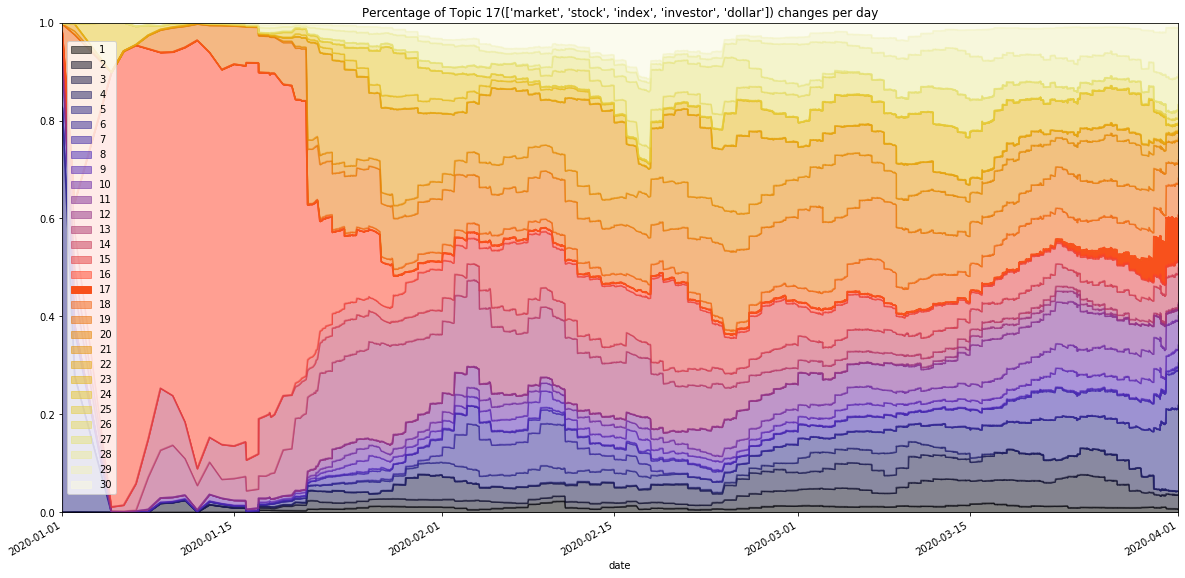

In [47]:
# plot the change of topic related to stock market vetilation due to Coronavirus outbreak
plot_specific_topic(data, selected_topic_perc, my_color,topic_number=17)

## Change of topic distribution of all articles by Reuters

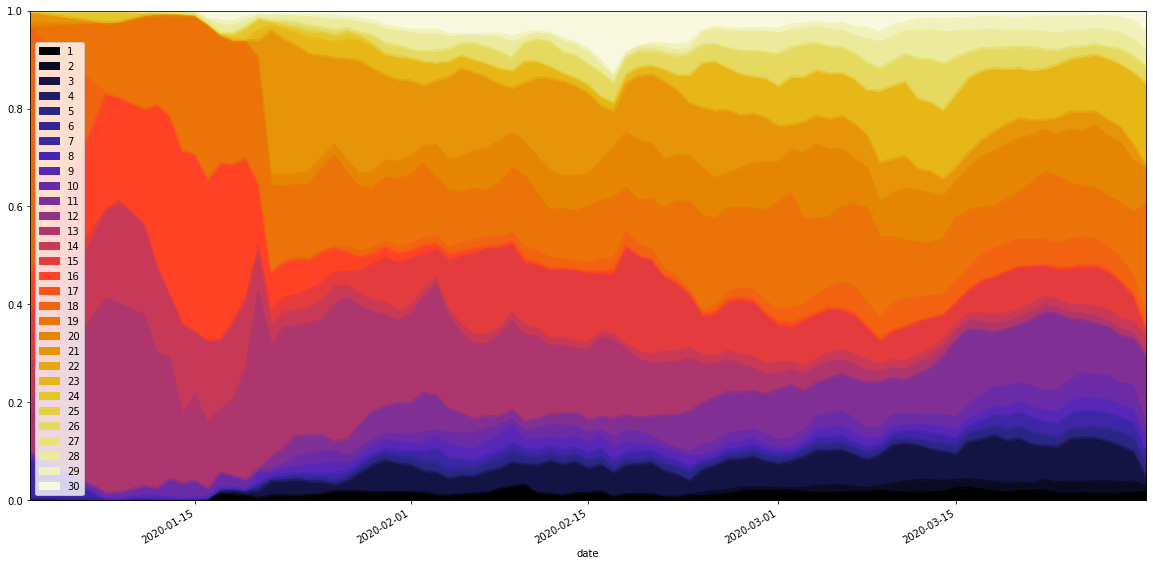

In [48]:
## Plot topic distribution of Reuters
plot_specific_topic(data[data.publication=='Reuters'], selected_topic_perc, my_color,topic_number=None)

## Change of topic distribution of all articles by New York Times

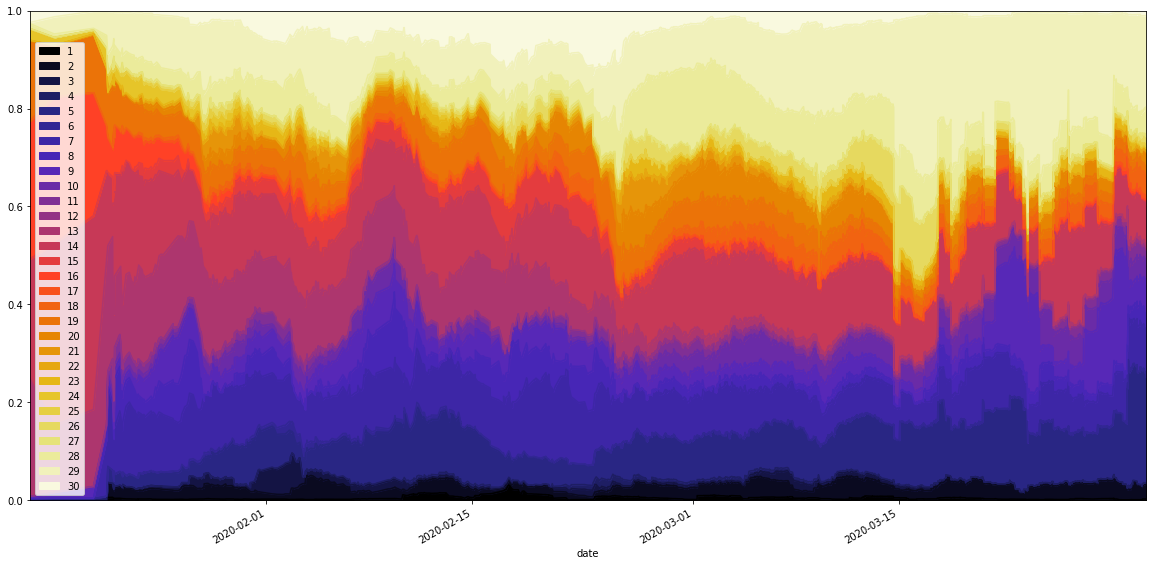

In [49]:
plot_specific_topic(data[data.publication=='The New York Times'], selected_topic_perc, my_color,topic_number=None)

## Change of topic distribution of all articles by Washington Post

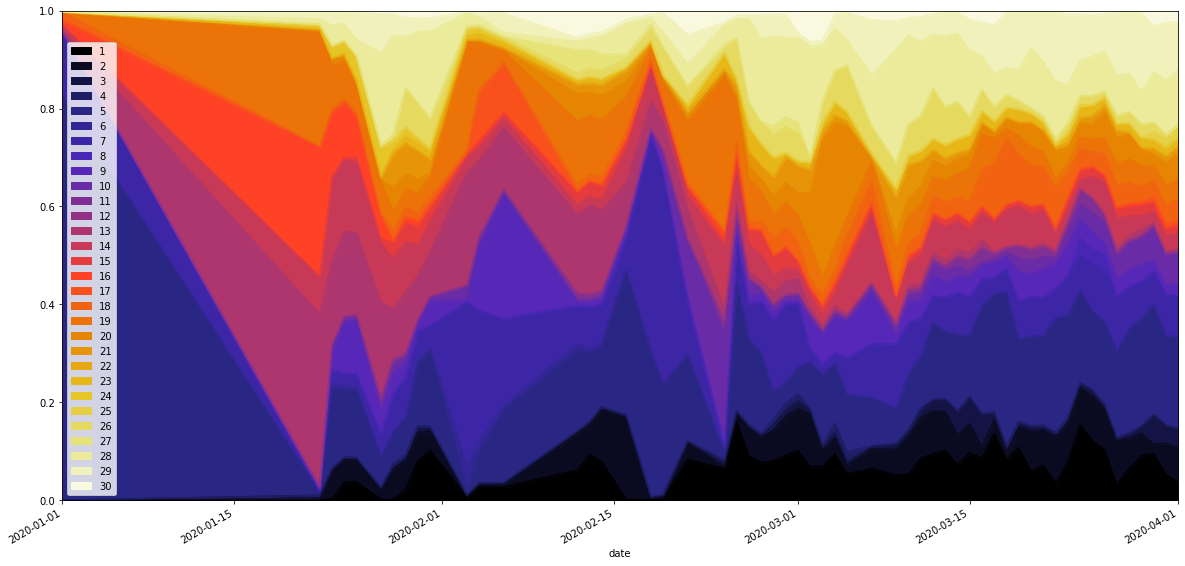

In [50]:
plot_specific_topic(data[data.publication=='Washington Post'], selected_topic_perc, my_color,topic_number=None)

## Change of topic distribution of all articles by Wikipedia


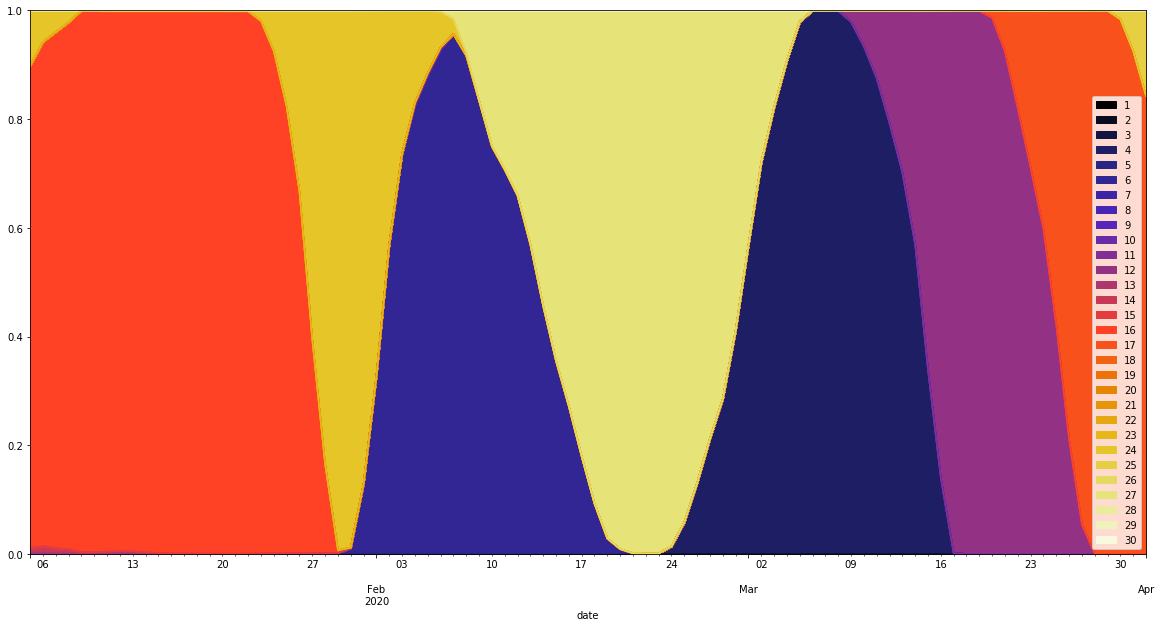

In [52]:
plot_specific_topic(data[data.publication=='Wikipedia'], selected_topic_perc, my_color,topic_number=None)

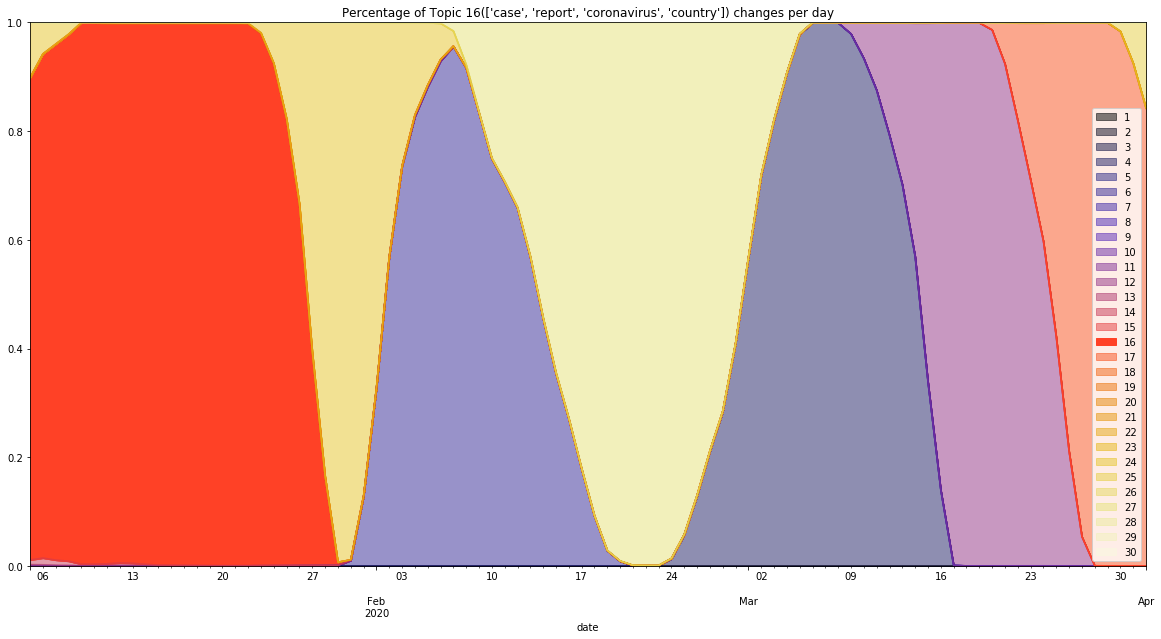

In [54]:
plot_specific_topic(data[data.publication=='Wikipedia'], selected_topic_perc, my_color,topic_number=16)

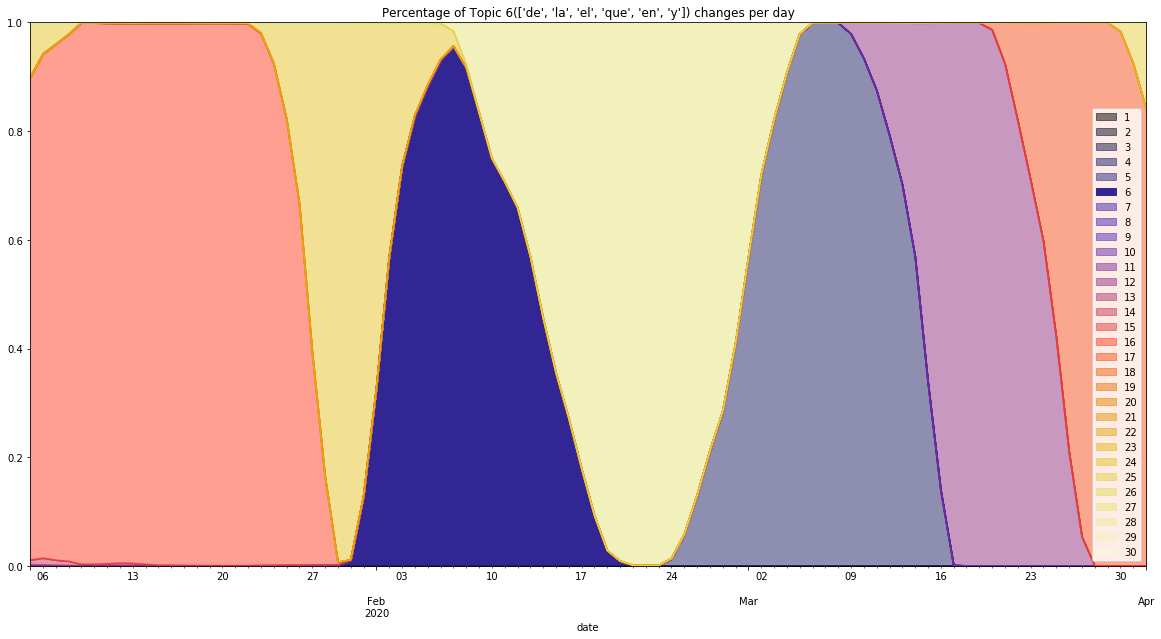

In [58]:
plot_specific_topic(data[data.publication=='Wikipedia'], selected_topic_perc, my_color,topic_number=6)

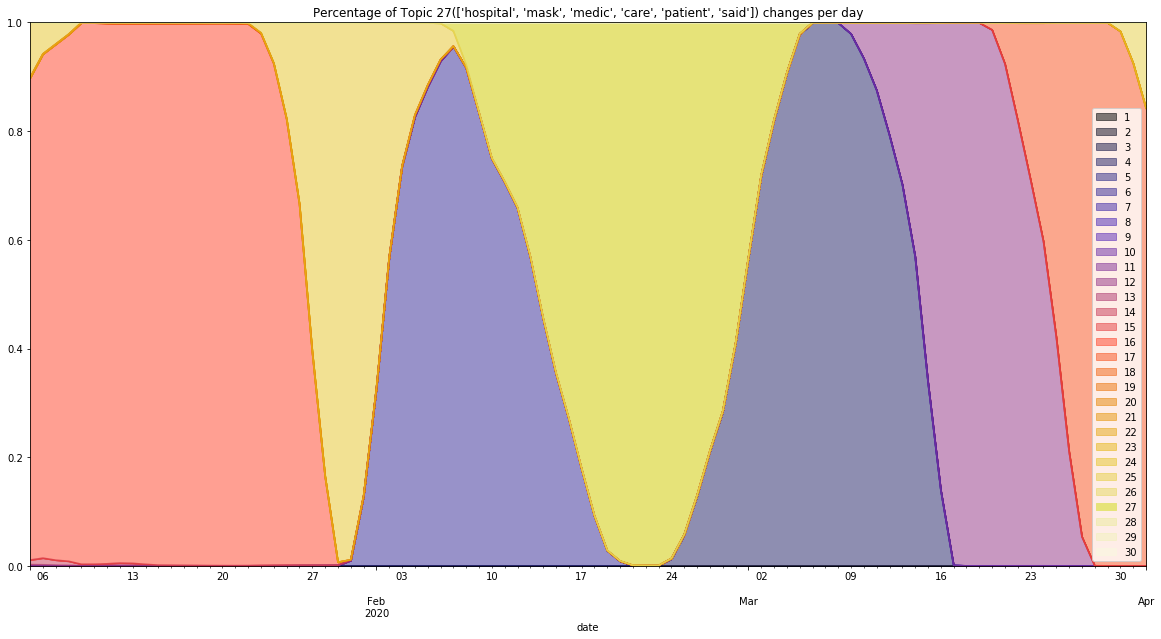

In [59]:
plot_specific_topic(data[data.publication=='Wikipedia'], selected_topic_perc, my_color,topic_number=27)

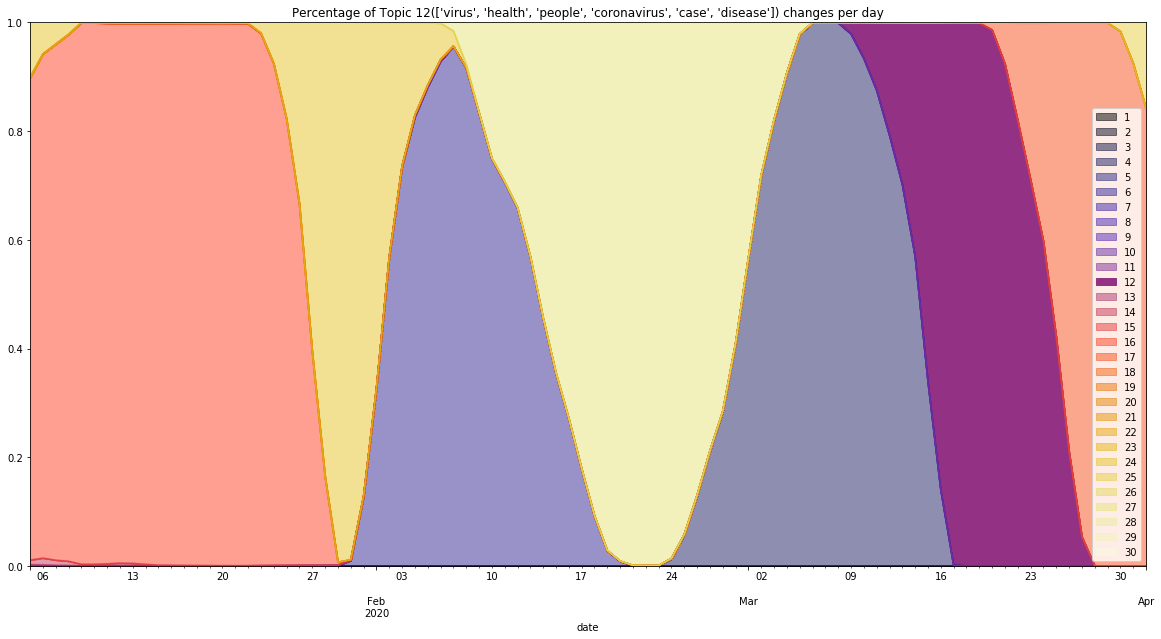

In [60]:
plot_specific_topic(data[data.publication=='Wikipedia'], selected_topic_perc, my_color,topic_number=12)

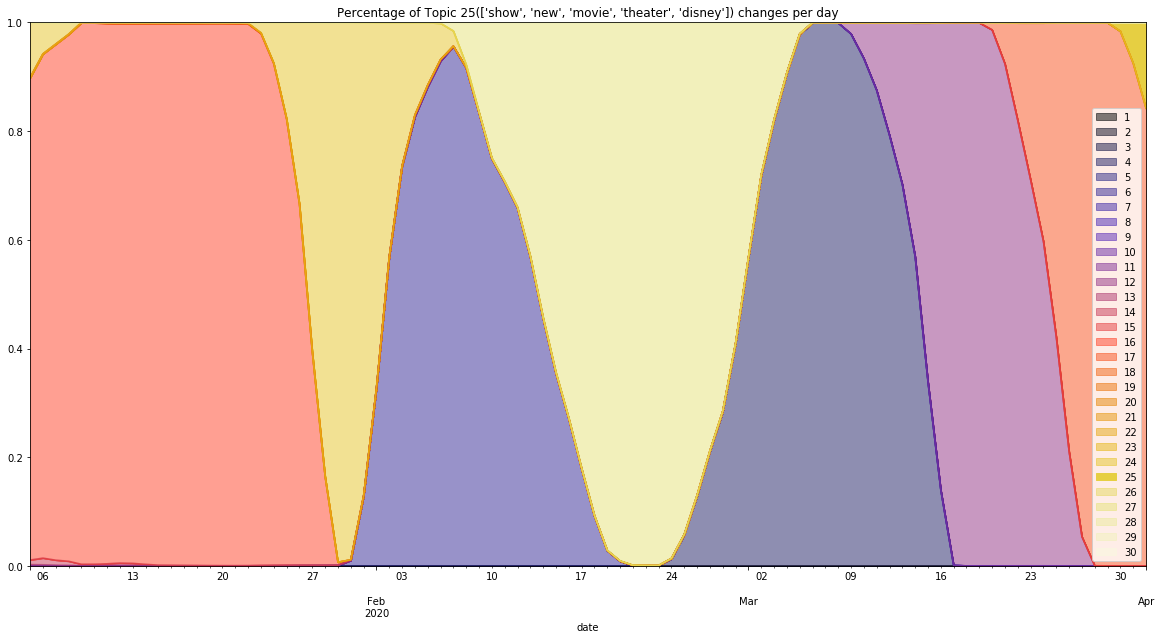

In [61]:
plot_specific_topic(data[data.publication=='Wikipedia'], selected_topic_perc, my_color,topic_number=25)